In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataFrames

#### Most data wrangling already happened, during extraction from Google Sheets, with names changed in a git ignored piece of code

<center>df = `harvest_party_expenses.csv`</center>

In [2]:
# read in main expenses csv as a df
df = pd.read_csv('./static/resources/harvest_party_expenses.csv')
df.head()

,Name,Expense,Expense Amt,Date bought,Category
0,Randy Detman,Key chains,150,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50,2017,Bar
2,Randy Detman,Cleaning service,60,2017,Cleaning
3,Randy Detman,Carpet cleaner,50,2017,Cleaning
4,Morning Glory,Brau kegs,140,2017,Bar


In [3]:
# convert all 'Expense Amt' to float with regex (remove $ and ,)
df['Expense Amt'] = df['Expense Amt'].replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'Expense Amt' are floats
df.dtypes

Name            object
Expense         object
Expense Amt    float64
Date bought      int64
Category        object
dtype: object

In [4]:
# rename columns
df = df.rename(columns={'Expense Amt': 'Amount', 'Date bought': "Year"})
df.head()

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.0,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50.0,2017,Bar
2,Randy Detman,Cleaning service,60.0,2017,Cleaning
3,Randy Detman,Carpet cleaner,50.0,2017,Cleaning
4,Morning Glory,Brau kegs,140.0,2017,Bar


<center>po_df = `pay_outs.csv`</center>

In [5]:
# read in pay_outs csv as a df
po_df = pd.read_csv('./static/resources/pay_outs.csv')
po_df.head()

,Year,Name,Paid
0,2017,Randy Detman,646
1,2017,Watsonville,40
2,2017,Morning Glory,190
3,2017,Tom Brady,327
4,2018,Randy Detman,950


In [6]:
# convert all 'Paid' to float with regex (remove $ and ,)
po_df.Paid = po_df.Paid.replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'Paid' are floats
po_df.dtypes

Year      int64
Name     object
Paid    float64
dtype: object

<center>don_df = `donations.csv`</center>

In [7]:
don_df = pd.read_csv('./static/resources/donations.csv')
don_df

,year,donations
0,2023,"$5,095.00"
1,2022,"$5,485.00"
2,2021,"$1,981.00"
3,2019,"$3,242.40"
4,2018,"$1,884.00"
5,2017,"$1,214.00"
6,2016,NaN
7,2015,NaN
8,2014,NaN


In [8]:
# convert all 'donations' to float with regex (remove $ and ,)
don_df.donations = don_df.donations.replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'donations' are floats
don_df.dtypes

year           int64
donations    float64
dtype: object

In [9]:
don_df = don_df.rename(columns={'year': 'Year', 'donations': 'Donations'})
don_df.dropna(inplace=True)
don_df

,Year,Donations
0,2023,5095.0
1,2022,5485.0
2,2021,1981.0
3,2019,3242.4
4,2018,1884.0
5,2017,1214.0


<center>att_df = `attendees.csv`</center>

In [10]:
att_df = pd.read_csv('./static/resources/attendees.csv')
att_df

,year,facebook_going,facebook_maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


In [11]:
att_df.dtypes

year               int64
facebook_going     int64
facebook_maybes    int64
dtype: object

In [12]:
att_df = att_df.rename(columns={'year': 'Year', 'facebook_going': 'Going', 'facebook_maybes': 'Maybes'})
att_df

,Year,Going,Maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


#### Data wrangling complete

#### ------------

#### Describe the dfs

In [13]:
df.describe()

,Amount,Year
count,97.000000,97.000000
mean,191.973608,2020.288660
std,207.227895,2.164865
min,0.000000,2017.000000
25%,60.000000,2019.000000
50%,116.740000,2021.000000
75%,214.120000,2022.000000
max,950.000000,2023.000000


In [14]:
po_df.describe()

,Year,Paid
count,30.000000,30.000000
mean,2020.200000,616.597000
std,2.203446,533.797969
min,2017.000000,20.000000
25%,2019.000000,180.055000
50%,2019.000000,560.000000
75%,2022.000000,947.245000
max,2023.000000,2002.940000


In [15]:
don_df.describe()

,Year,Donations
count,6.000000,6.000000
mean,2020.000000,3150.233333
std,2.366432,1786.684104
min,2017.000000,1214.000000
25%,2018.250000,1908.250000
50%,2020.000000,2611.700000
75%,2021.750000,4631.850000
max,2023.000000,5485.000000


In [16]:
att_df.describe()

,Year,Going,Maybes
count,9.000000,9.000000,9.000000
mean,2018.333333,111.555556,44.222222
std,3.162278,47.579174,24.355583
min,2014.000000,40.000000,11.000000
25%,2016.000000,95.000000,29.000000
50%,2018.000000,100.000000,40.000000
75%,2021.000000,136.000000,54.000000
max,2023.000000,194.000000,85.000000


## Plots!

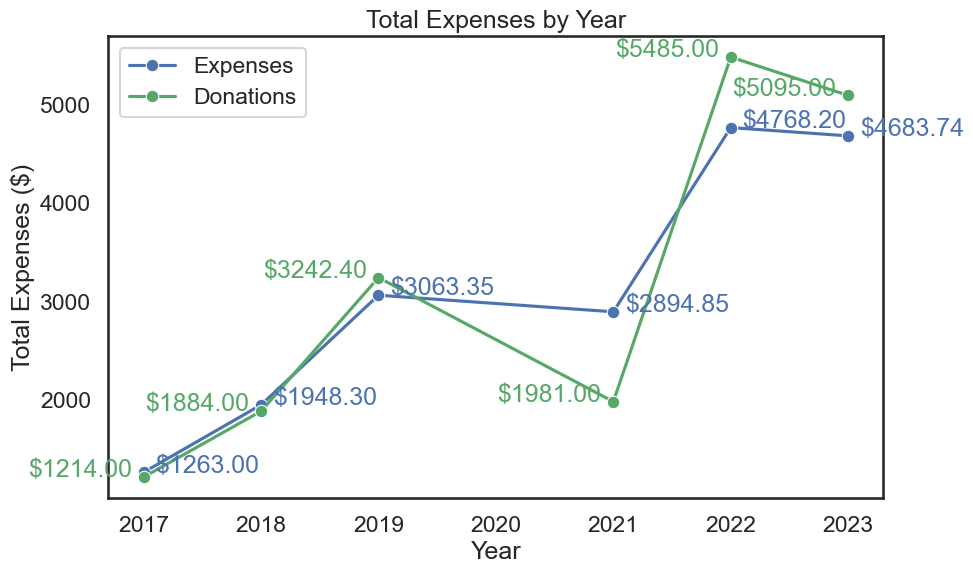

In [17]:
# plot expenses and donations by year as a line chart
sns.set(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount', data=df, estimator='sum', errorbar=None, marker='o', color='b')
sns.lineplot(x='Year', y='Donations', data=don_df, errorbar=None, marker='o', color='g')

# annotate each data point
df_sum = df.groupby('Year')['Amount'].sum()
for year, amount in df_sum.items():
    plt.text(year + 0.1, amount, f'${amount:.2f}', horizontalalignment='left', color='b')
for _, row in don_df.iterrows():
    year = row.Year
    amount = row.Donations
    plt.text(year - 0.1, amount, f'${amount:.2f}', horizontalalignment='right', color='g')

plt.title('Total Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.legend(['Expenses', 'Donations'])
plt.show()
